In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from idlescape import *
try:
    from ipywidgets import interact, widgets
except ImportError:
    %pip install ipywidgets
    from ipywidgets import interact, widgets

locationFile = "data/locations.json"
itemFile = "data/items.json"
player = Character(
    datafile=itemFile,
    fishing_level=72,
    fishing_bonus=18,
    fishing_set_bonus=0.0,
    bait_power=55.5,
    reel_power=47+15,
    bonus_rarity=21,
    mining_level=86,
    mining_set_bonus=0.25,
    mining_bonus=59,
    foraging_level=82,
    foraging_bonus=59,
    foraging_set_bonus=0.0,
    )
fishing = Fishing(player, locationFile);
mining = Mining(player, locationFile);
foraging = Foraging(player, locationFile);

# Prototype page design, then export to jupyterlite
- Top portion should be a bunch of inputs that let the player input their levels and gear.
- Next would be a plot region where you select: plot-by-resource and plot-by-location
- Finally a table displaying resource rate by zone

### Todo
- [ ] Convert fractions to hourly rates
- [ ] Check we are using the min/max roll average

In [2]:
interact(lambda x: setattr( player, 'fishing_level', x ), 
         x=widgets.IntSlider(min=1, max=200, value=player.fishing_level, description='Fishing Level'))
interact(lambda x: setattr( player, 'mining_level', x ), 
         x=widgets.IntSlider(min=1, max=200, value=player.mining_level, description='Mining Level'))
interact(lambda x: setattr( player, 'foraging_level', x ), 
         x=widgets.IntSlider(min=1, max=200, value=player.foraging_level, description='Foraging Level'))

interactive(children=(IntSlider(value=72, description='Fishing Level', max=200, min=1), Output()), _dom_classe…

interactive(children=(IntSlider(value=86, description='Mining Level', max=200, min=1), Output()), _dom_classes…

interactive(children=(IntSlider(value=82, description='Foraging Level', max=200, min=1), Output()), _dom_class…

<function __main__.<lambda>(x)>

In [3]:
# Something added like:
"""
Fishing::get_locations_as_dataframe
"""

'\nFishing::get_locations_as_dataframe\n'

In [4]:
def summary_plot(action, zone):
    item_series = action.location_item_histogram(zone, interval='hour').round(1)
    if( item_series.sum() > 0 ):
        fig, axs = plt.subplots(1,2, figsize=(16,6))
        axs[0].set_title(zone)
        item_series.plot.pie(ax=axs[0])
        item_series.plot.bar(ax=axs[1])
        axs[1].bar_label(axs[1].containers[0])

In [5]:
zone = 'Stormy Seas'
#player.enchantments['Fiber Finder'] = 0
#player.reel_power = 40 + 8*3
summary_plot(fishing, zone)

#player.enchantments['Fiber Finder'] = 8
#player.reel_power = 40 + 3*3
summary_plot(fishing, zone)

dict_keys(['Grasslands', 'Verdant Valley', 'Fungal Grotto', 'The Tangle', 'Misty Marsh', 'Frozen Tundra', 'Haunted Woods', 'Living Forest'])

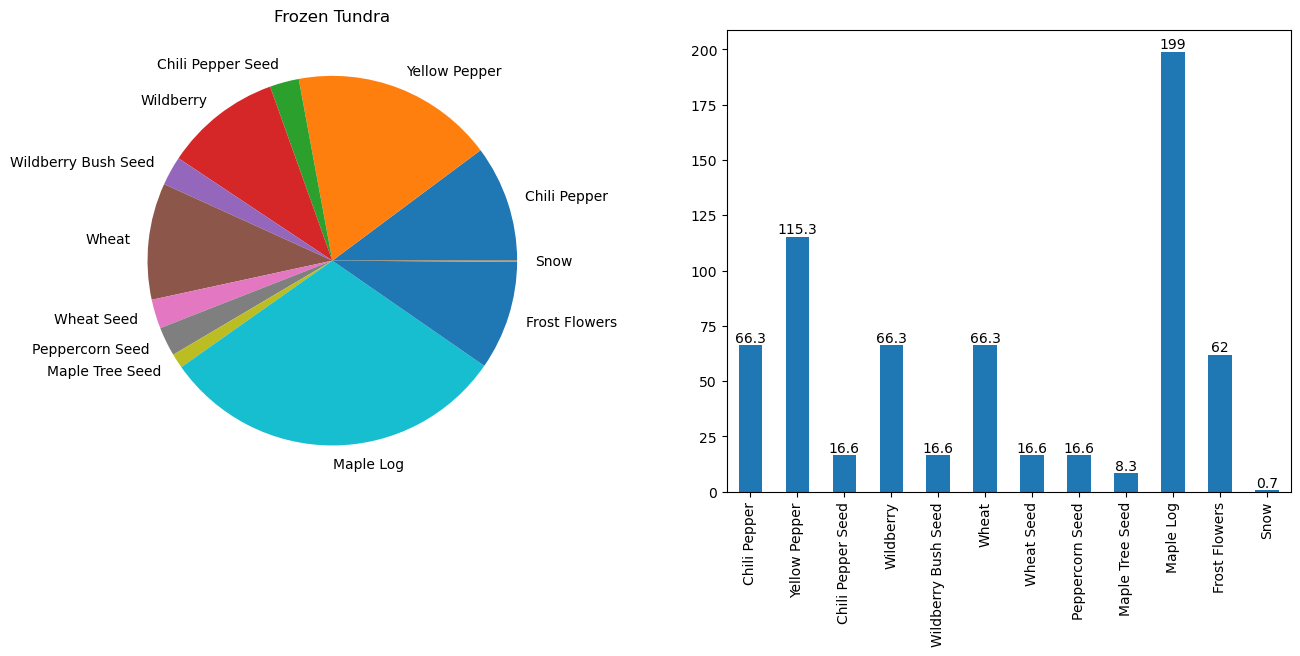

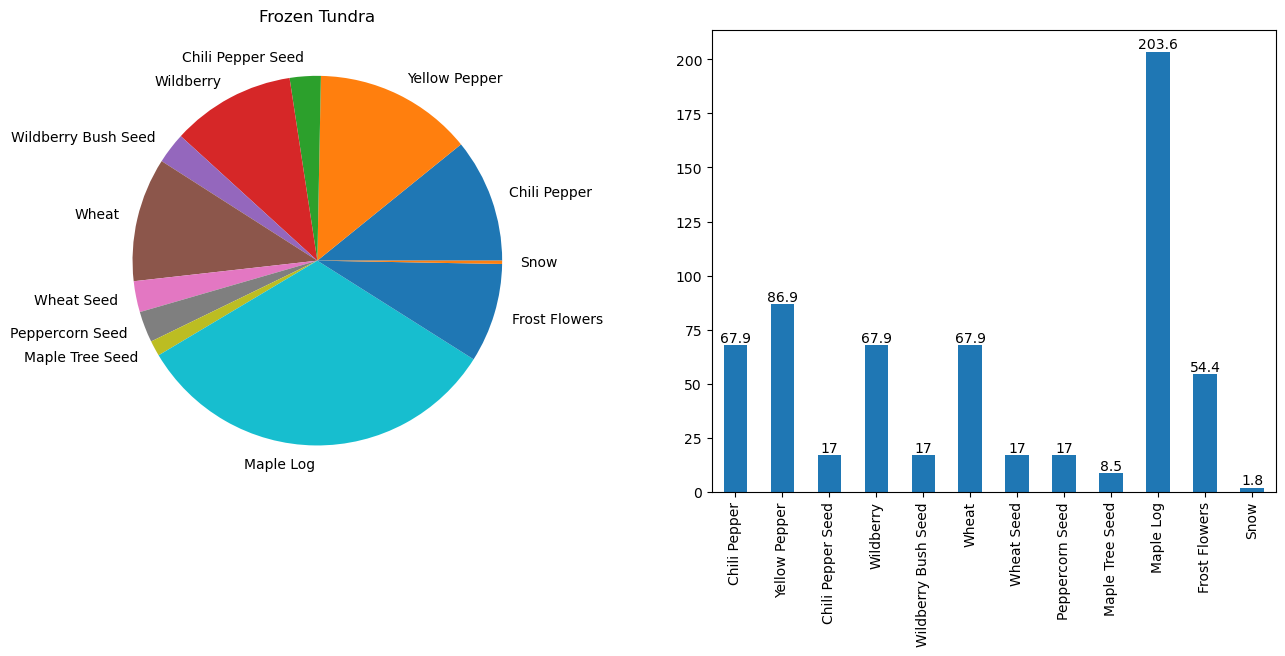

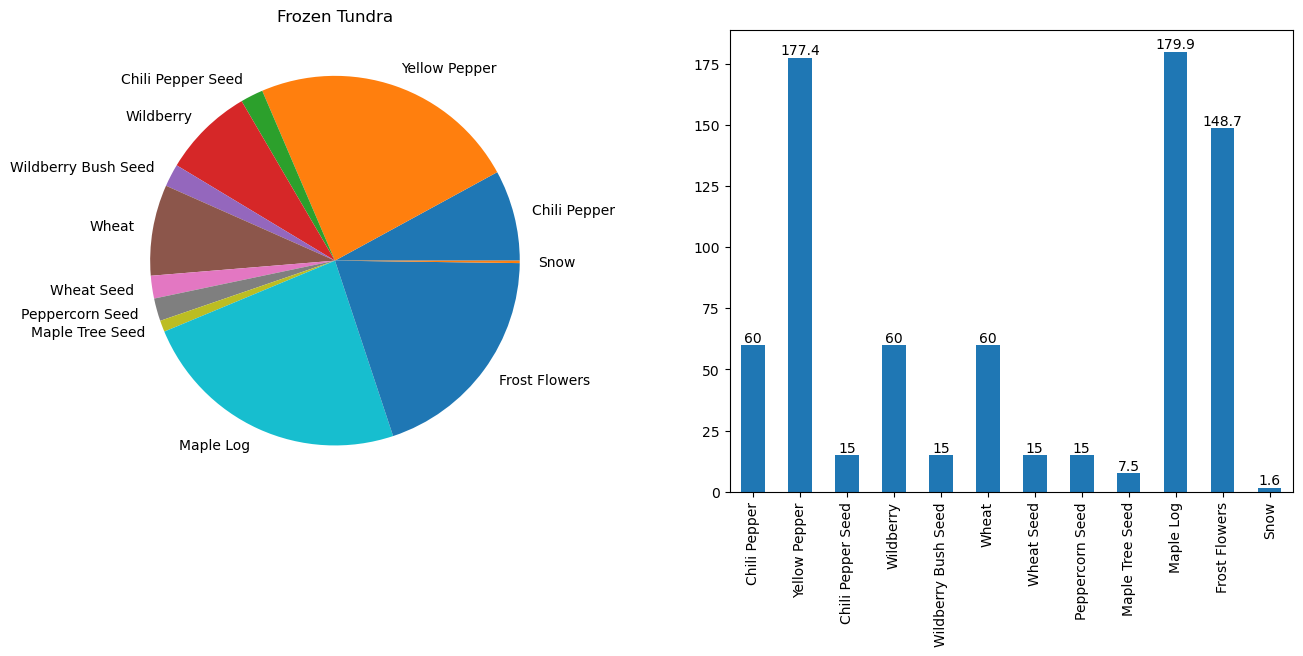

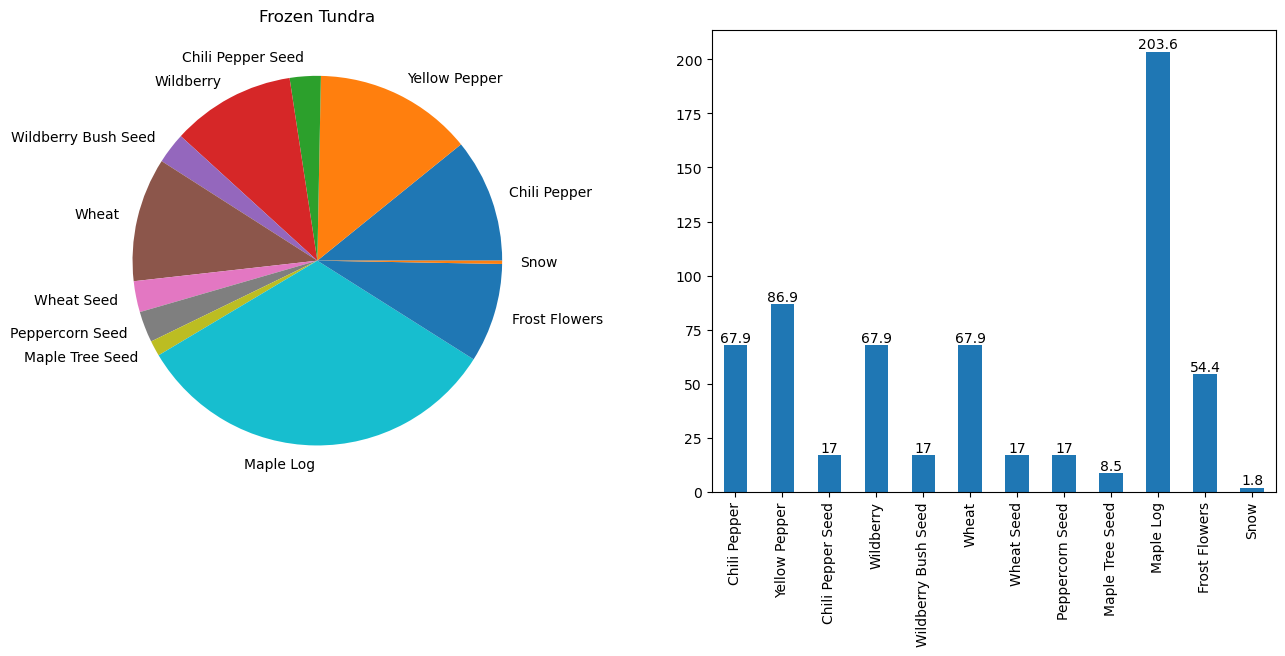

In [6]:
zone = 'Frozen Tundra'
display(foraging.list_of_actions())
#player.enchantments['nature'] = 0
#player.enchantments['herbalist'] = 0
#player.enchantments['seedHarvesting'] = 0
#summary_plot(foraging, zone)

player.enchantments['nature'] = 3
player.enchantments['herbalist'] = 3
player.enchantments['seedHarvesting'] = 3
summary_plot(foraging, zone)

player.enchantments['nature'] = 3
player.enchantments['herbalist'] = 0
player.enchantments['seedHarvesting'] = 0
summary_plot(foraging, zone)

player.enchantments['nature'] = 0
player.enchantments['herbalist'] = 3
player.enchantments['seedHarvesting'] = 0
summary_plot(foraging, zone)

player.enchantments['nature'] = 0
player.enchantments['herbalist'] = 0
player.enchantments['seedHarvesting'] = 3
summary_plot(foraging, zone)


dict_keys(['Clay Pit', 'City Outskirts Mine', 'Village Quarry', 'Desert Mine', 'Underground Mine', 'Hidden Mine', 'Volcano Mine', 'Slate Spires', 'Deep Pit'])

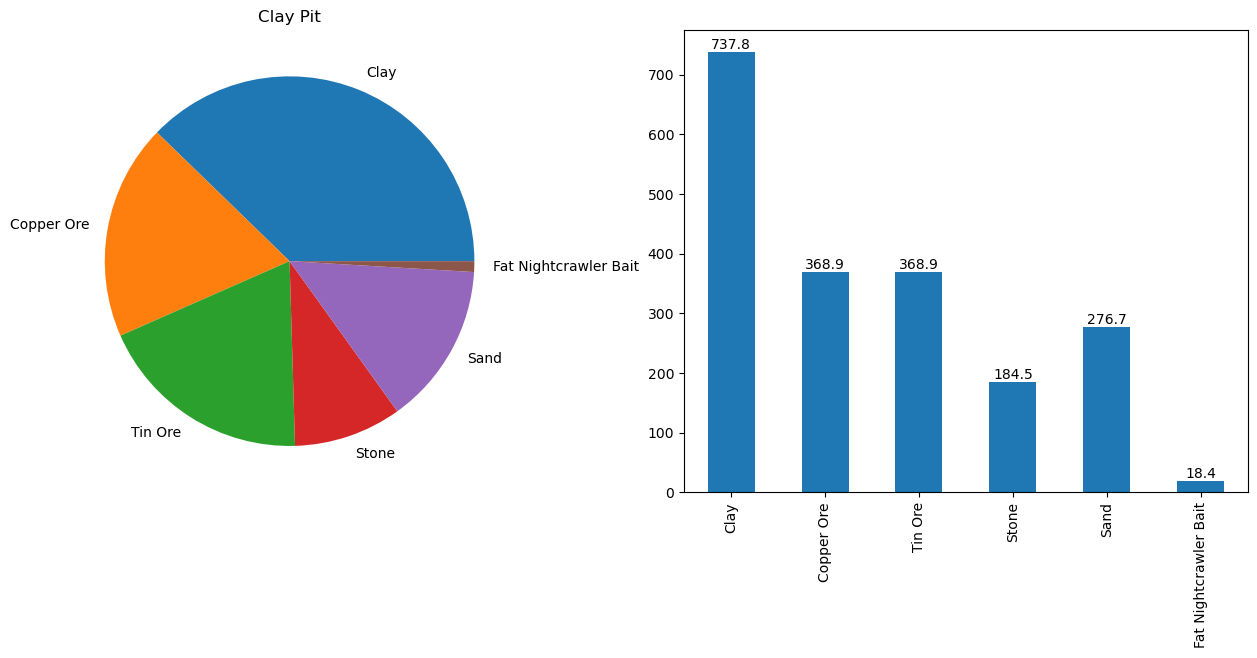

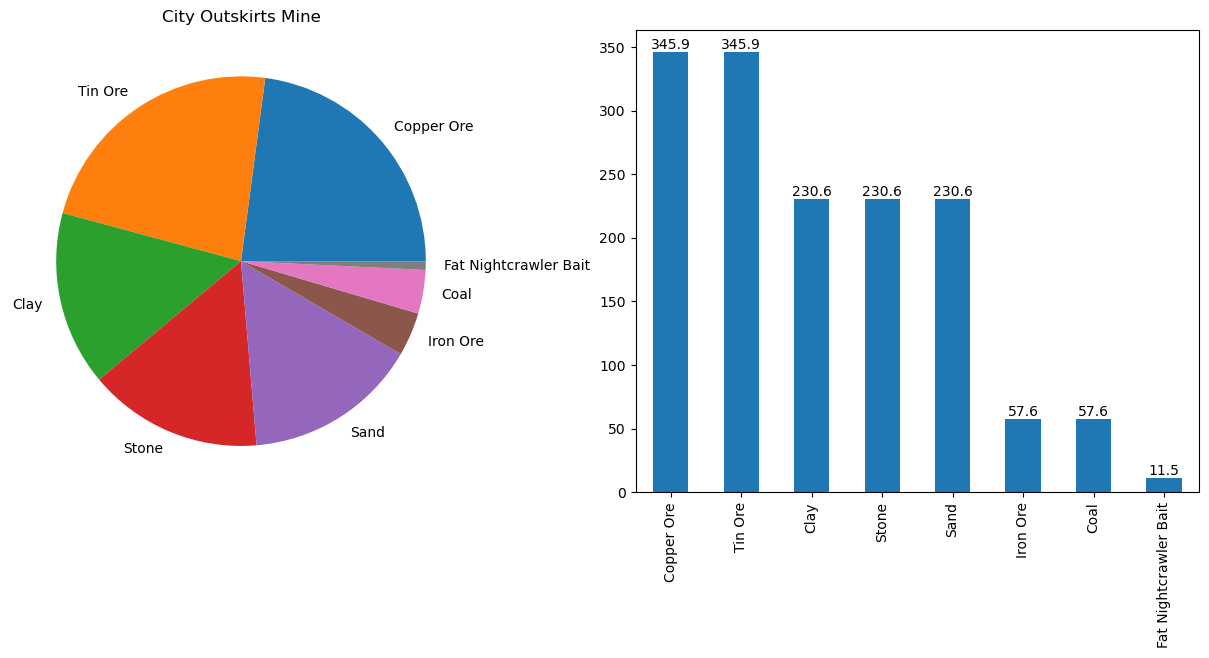

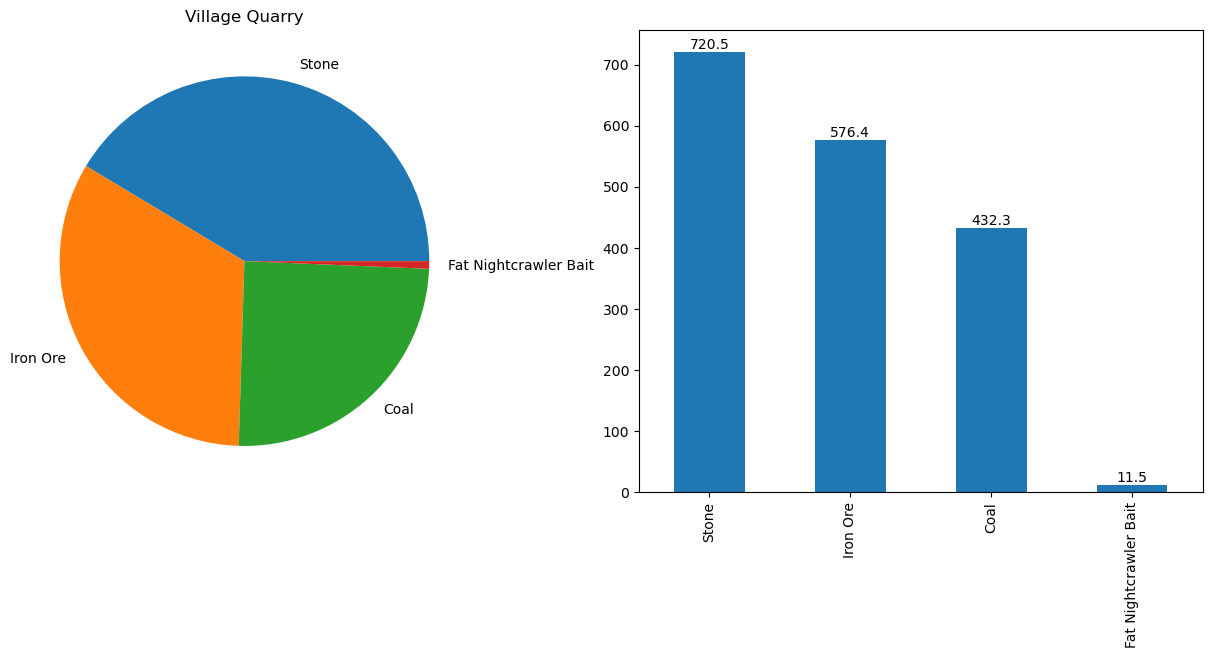

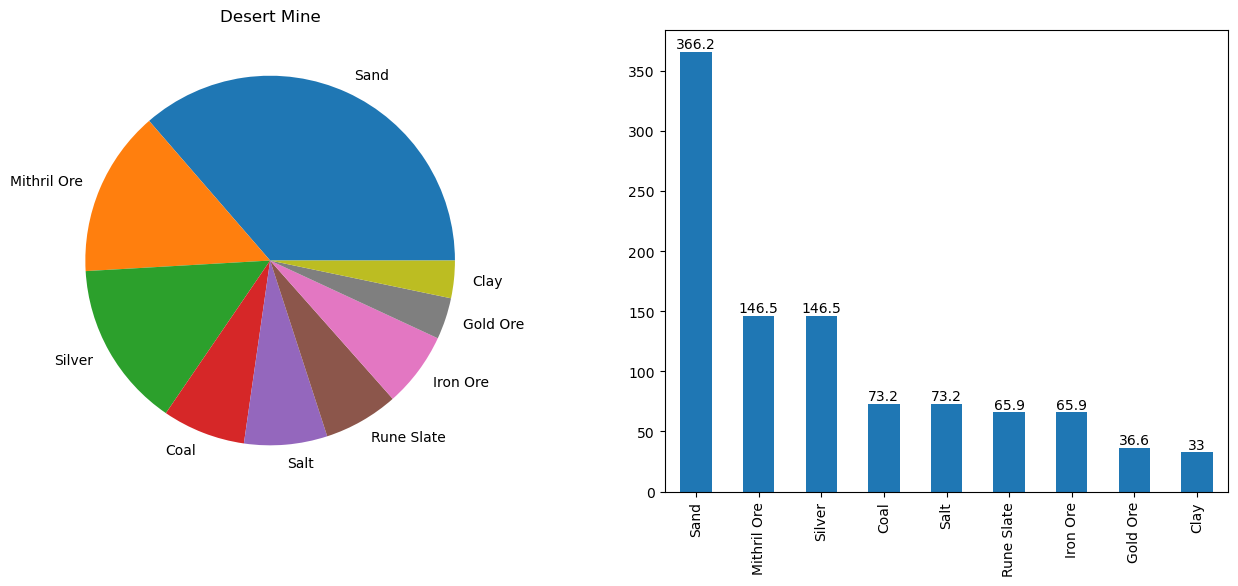

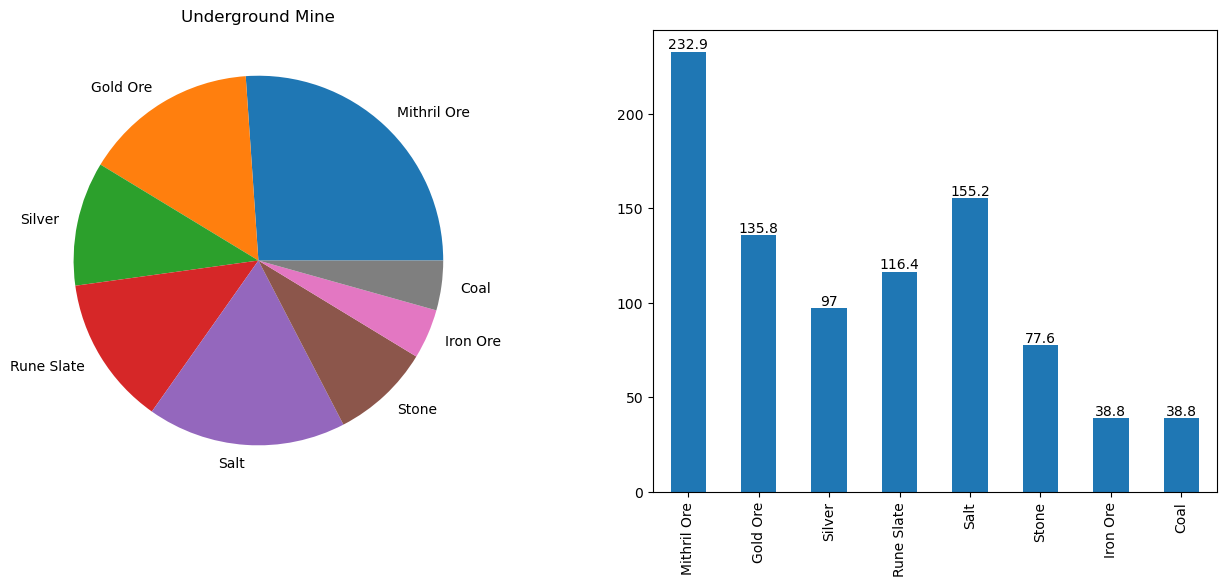

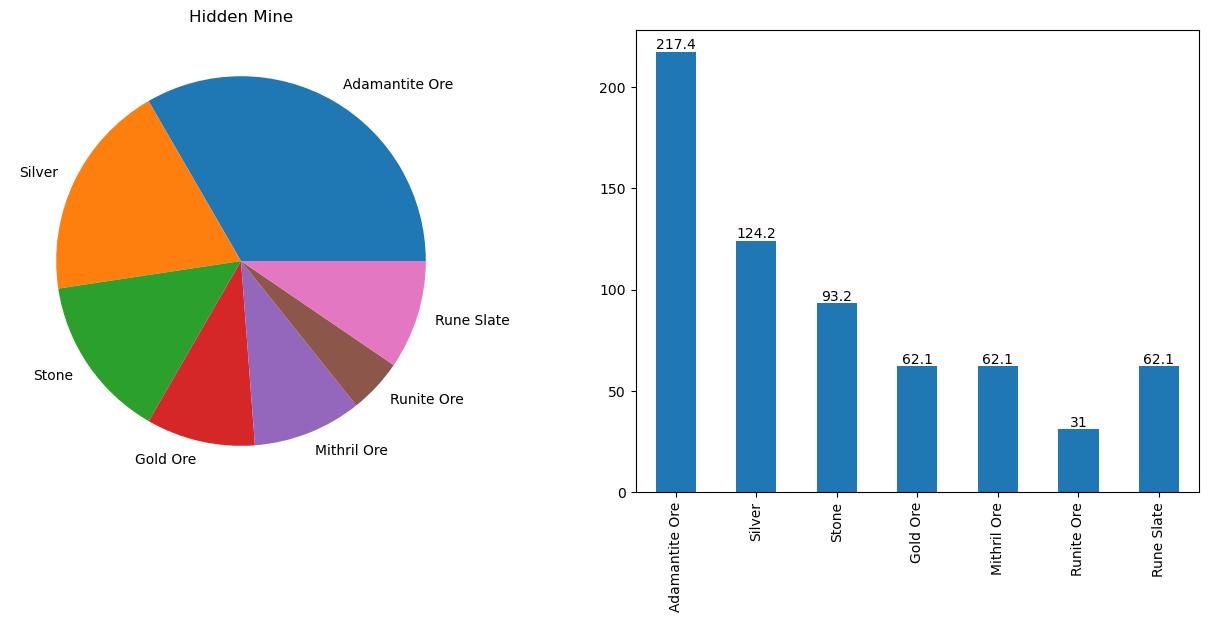

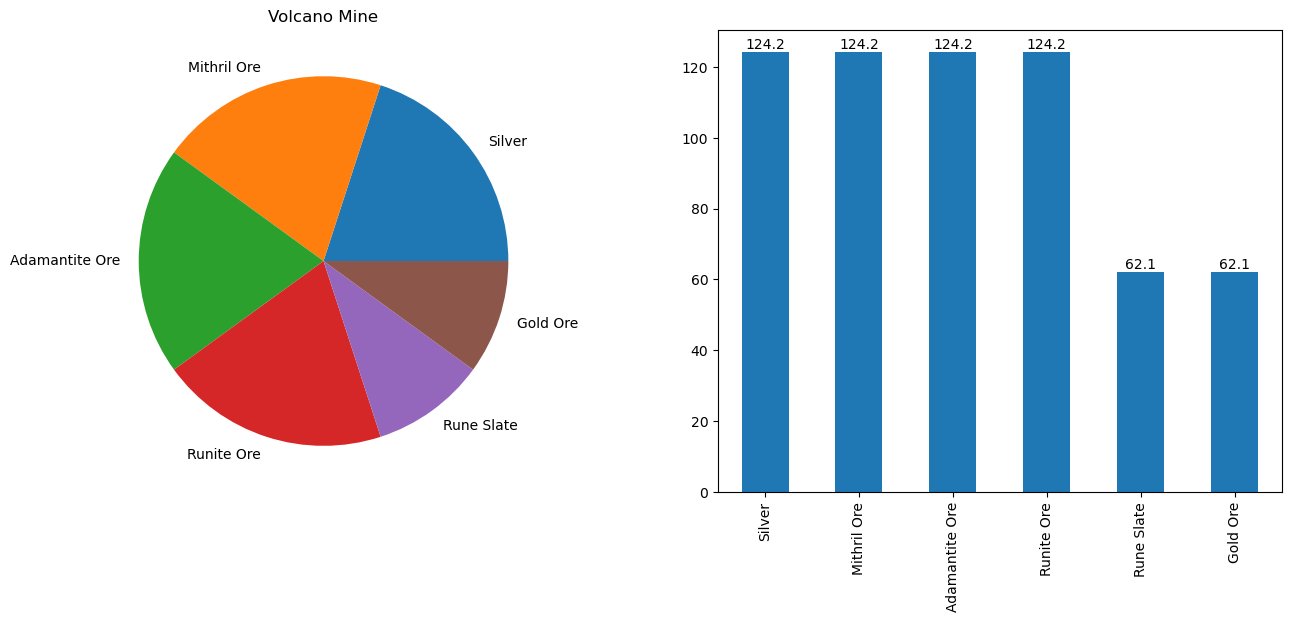

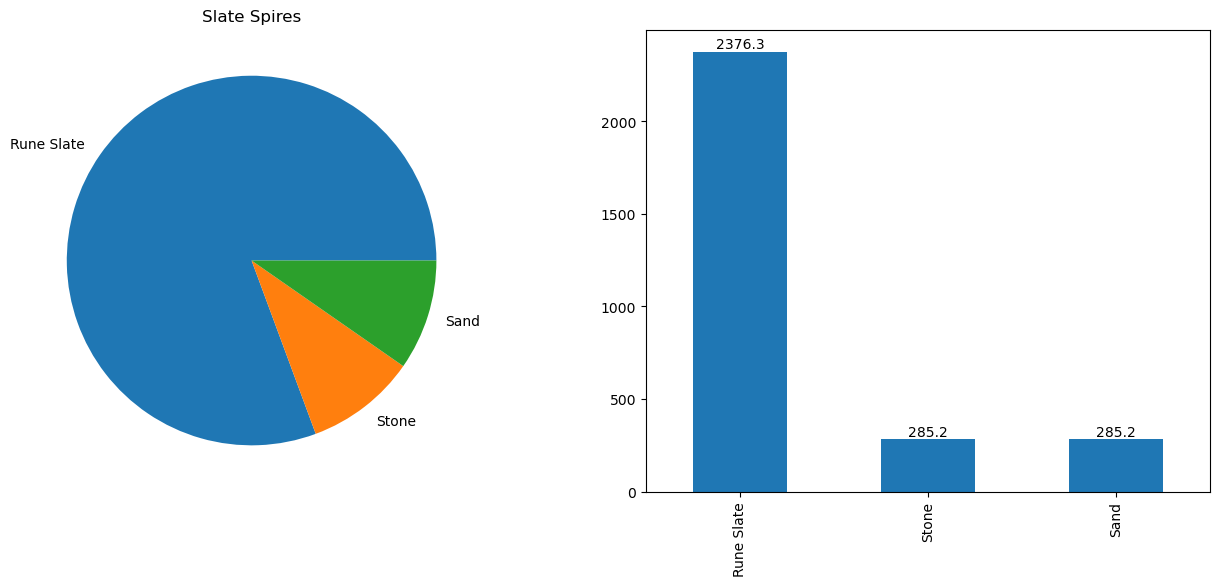

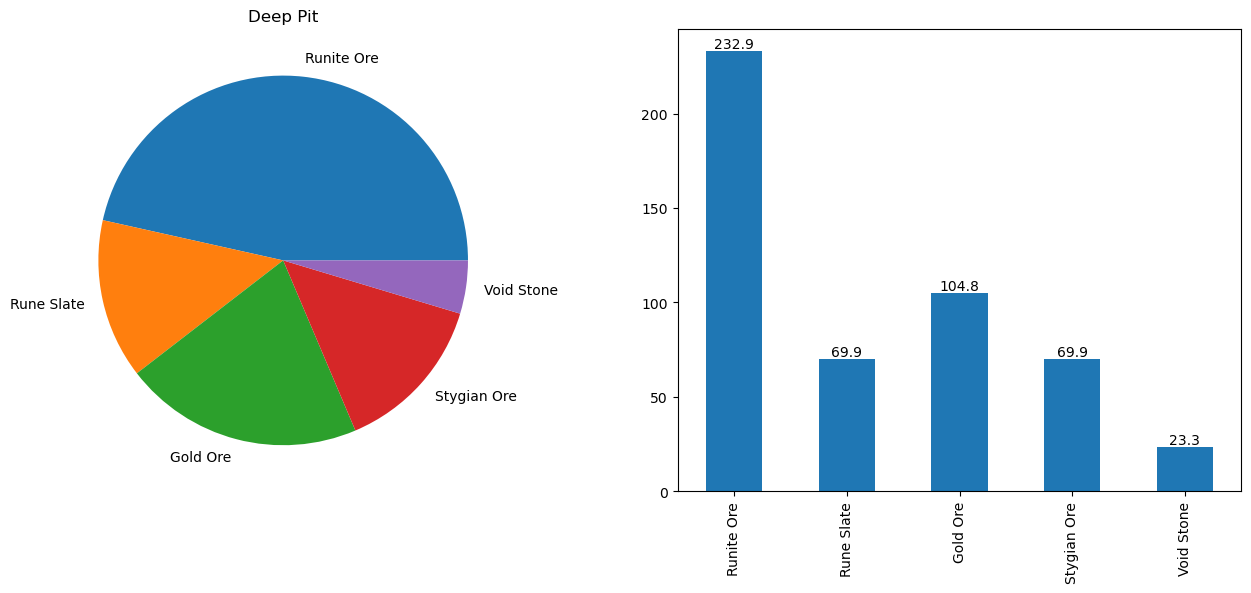

In [7]:
display(mining.list_of_actions())
for action_name in mining.list_of_actions():
    summary_plot(mining, action_name)

dict_keys(['Grasslands', 'Verdant Valley', 'Fungal Grotto', 'The Tangle', 'Misty Marsh', 'Frozen Tundra', 'Haunted Woods', 'Living Forest'])

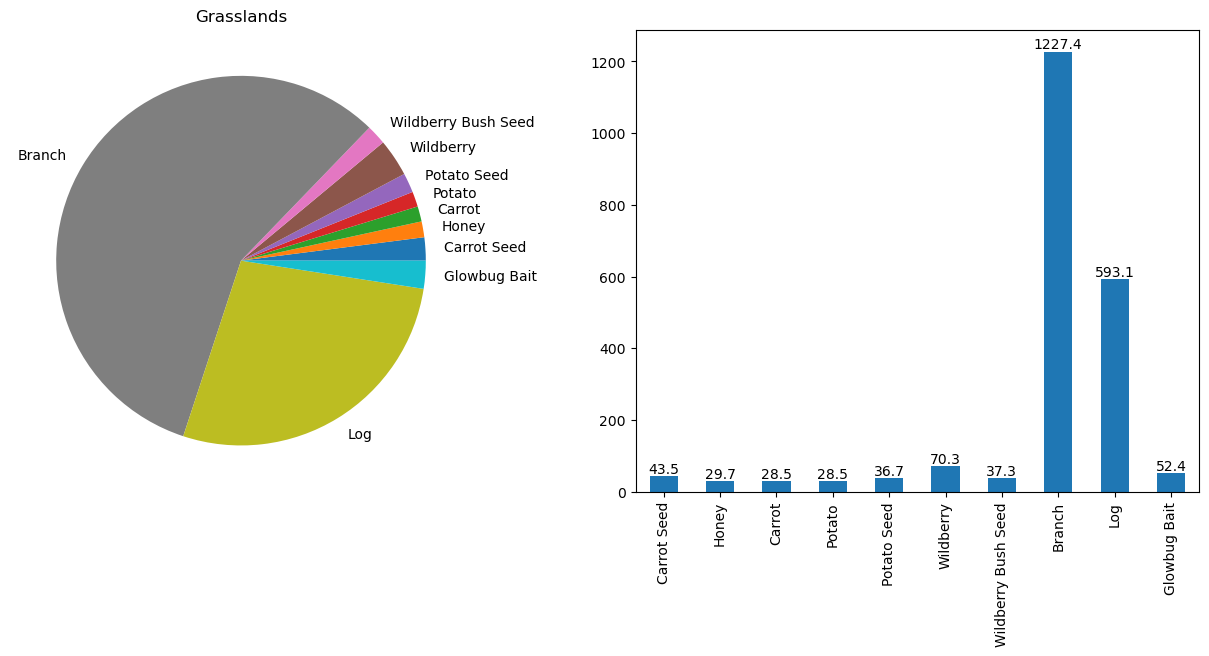

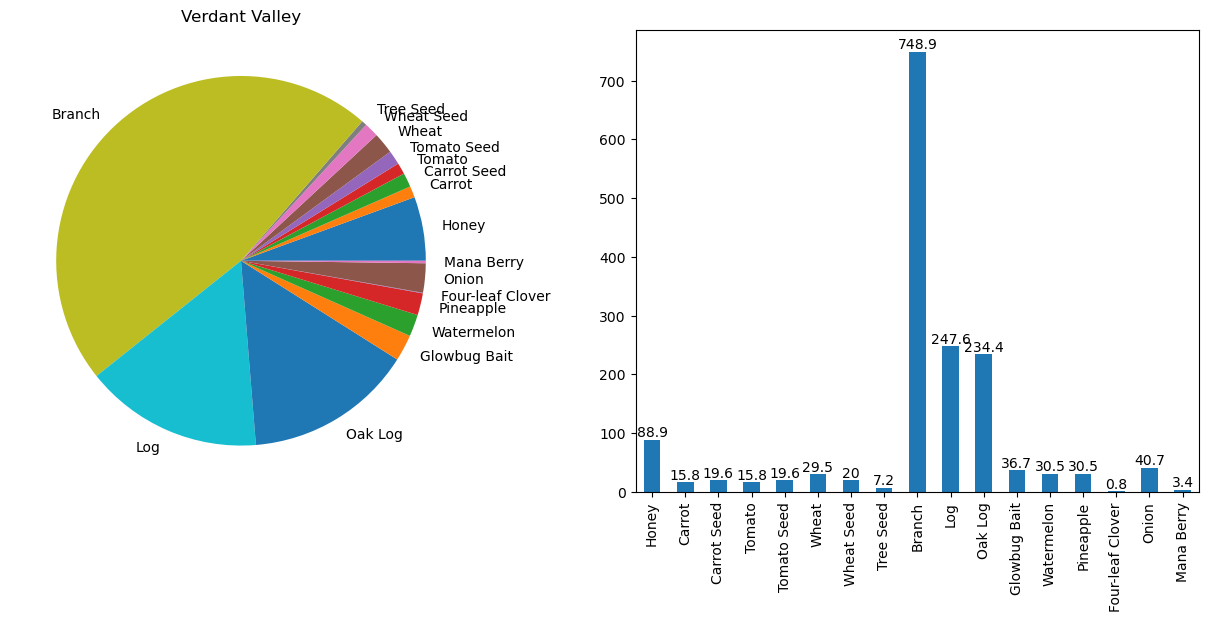

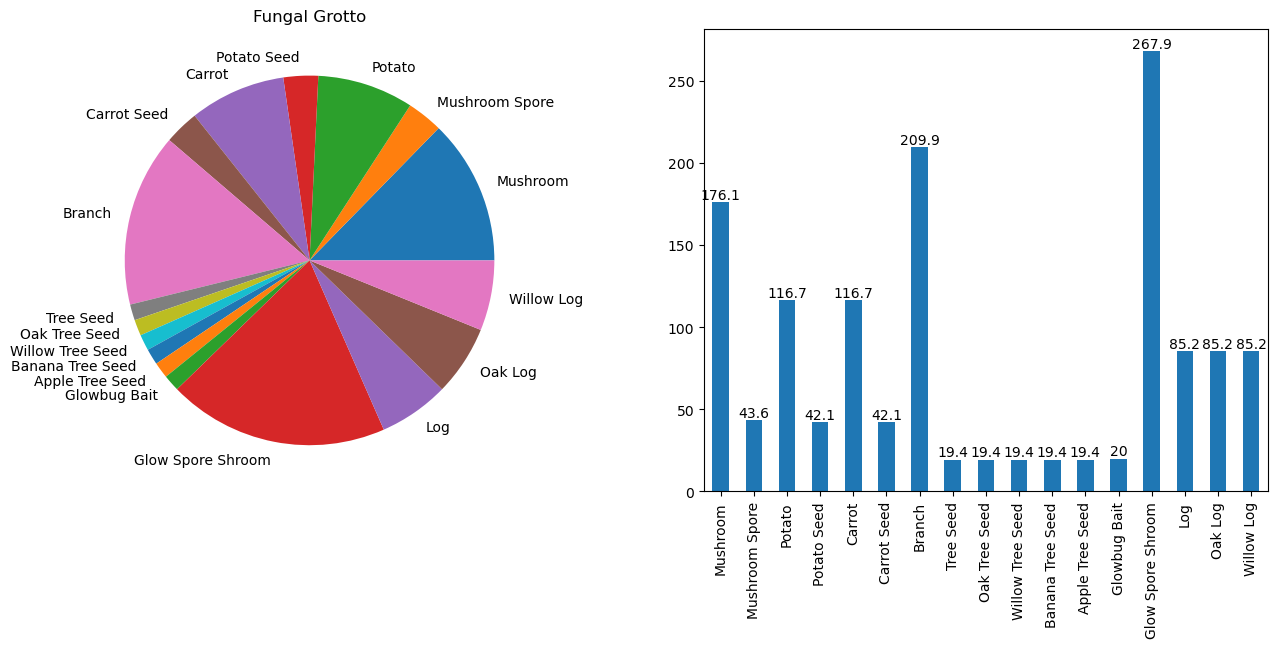

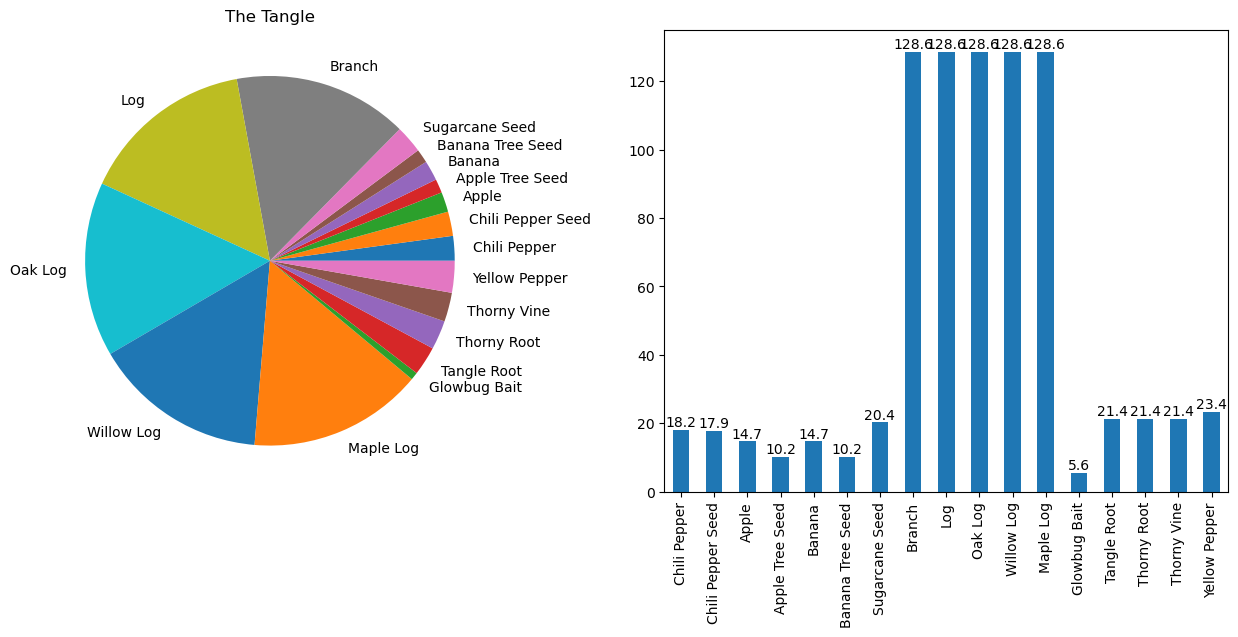

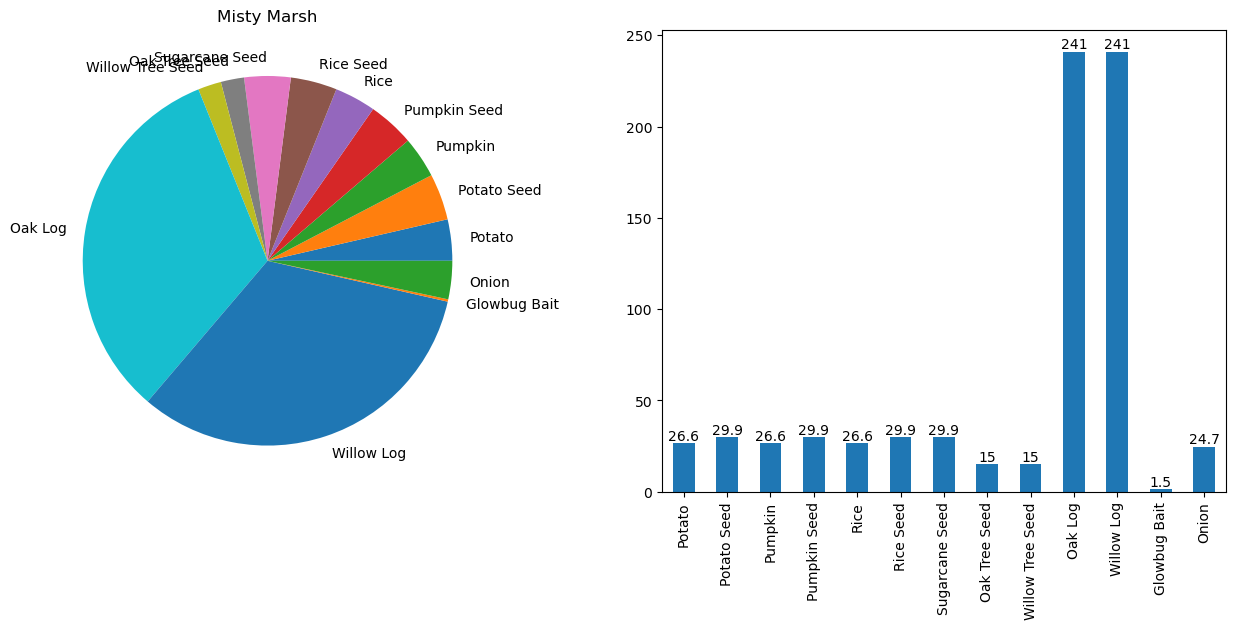

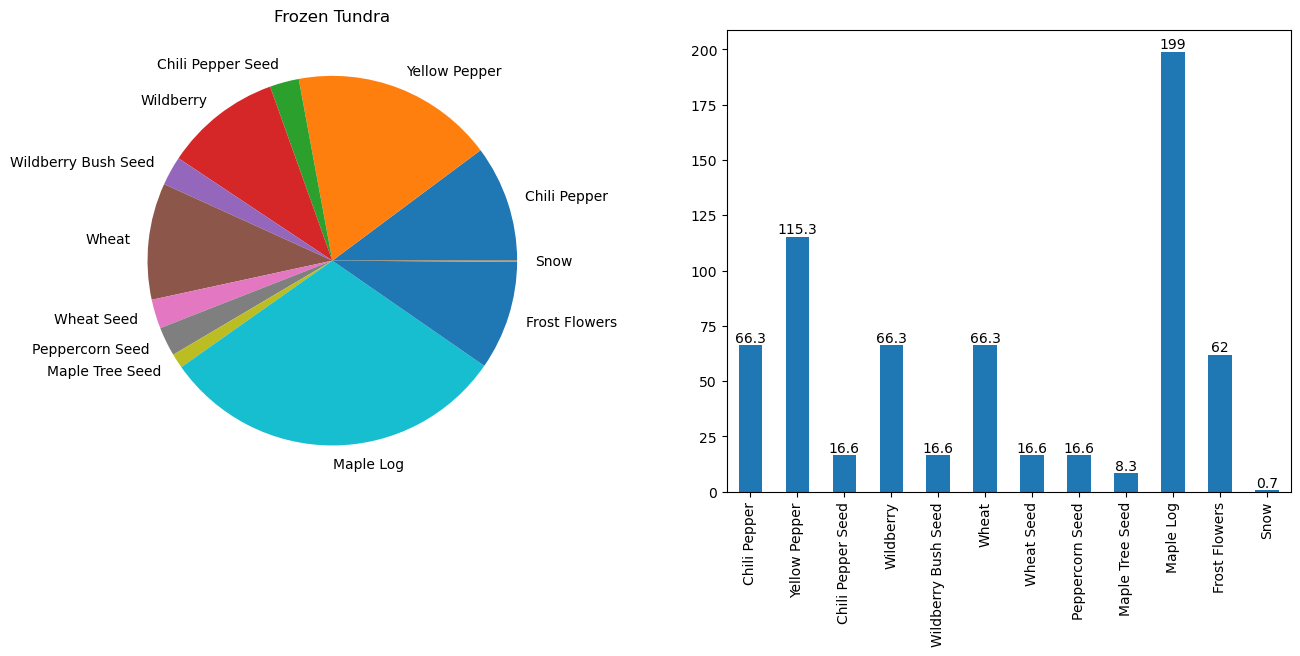

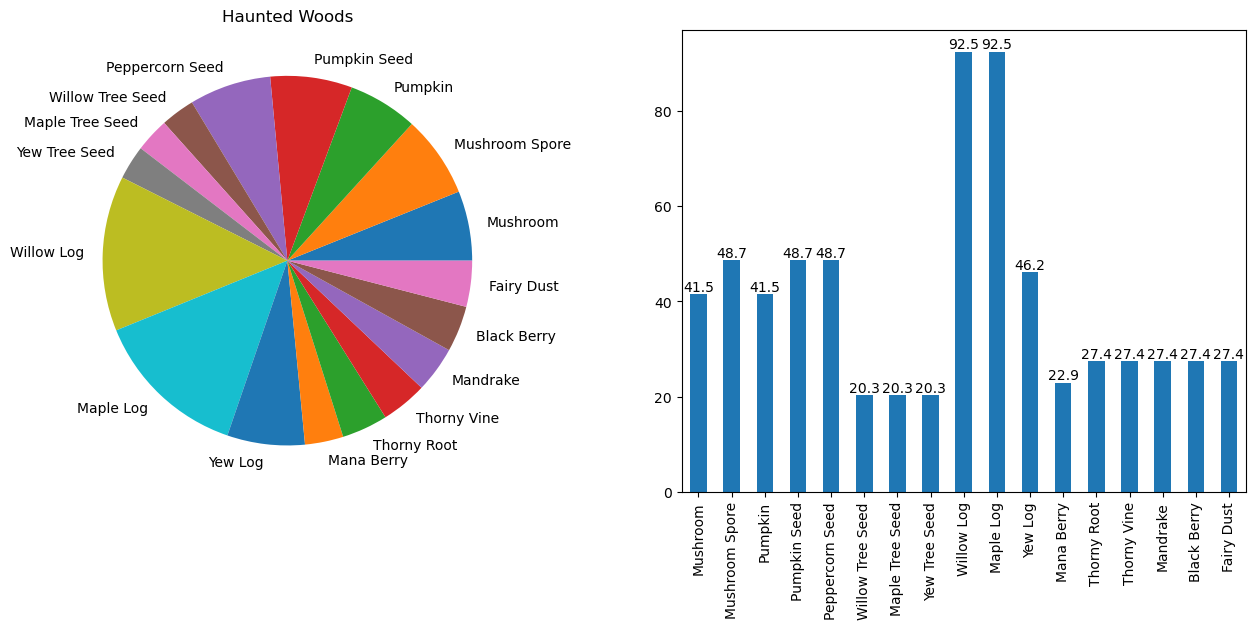

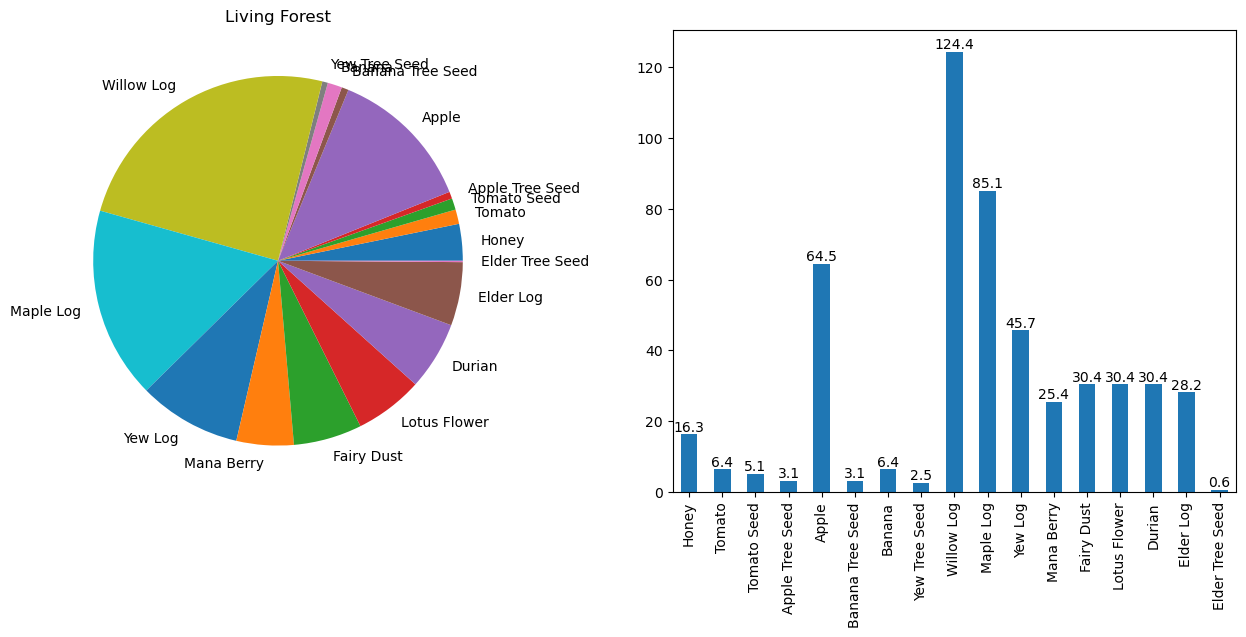

In [8]:
player.enchantments['nature'] = 3
player.enchantments['herbalist'] = 3
player.enchantments['seedHarvesting'] = 3
display(foraging.list_of_actions())
for action_name in foraging.list_of_actions():
    summary_plot(foraging, action_name)

dict_keys(['Shallow Pond', 'Lazy River', 'Still Lake', 'Open Ocean', 'Stormy Seas'])

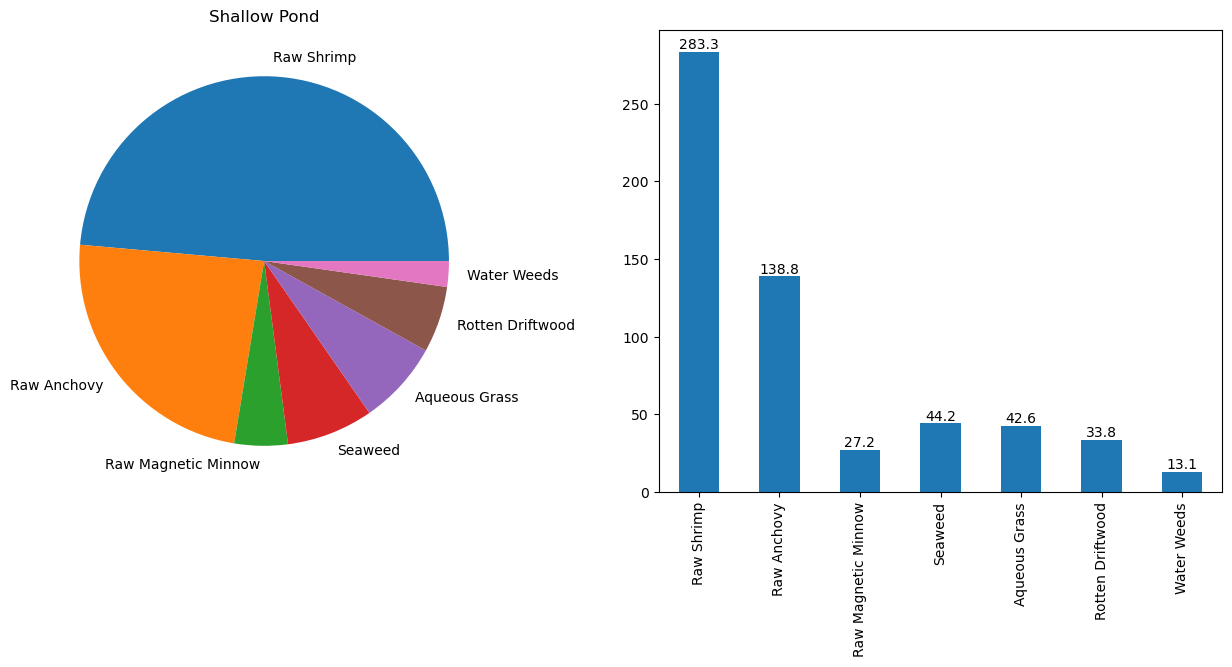

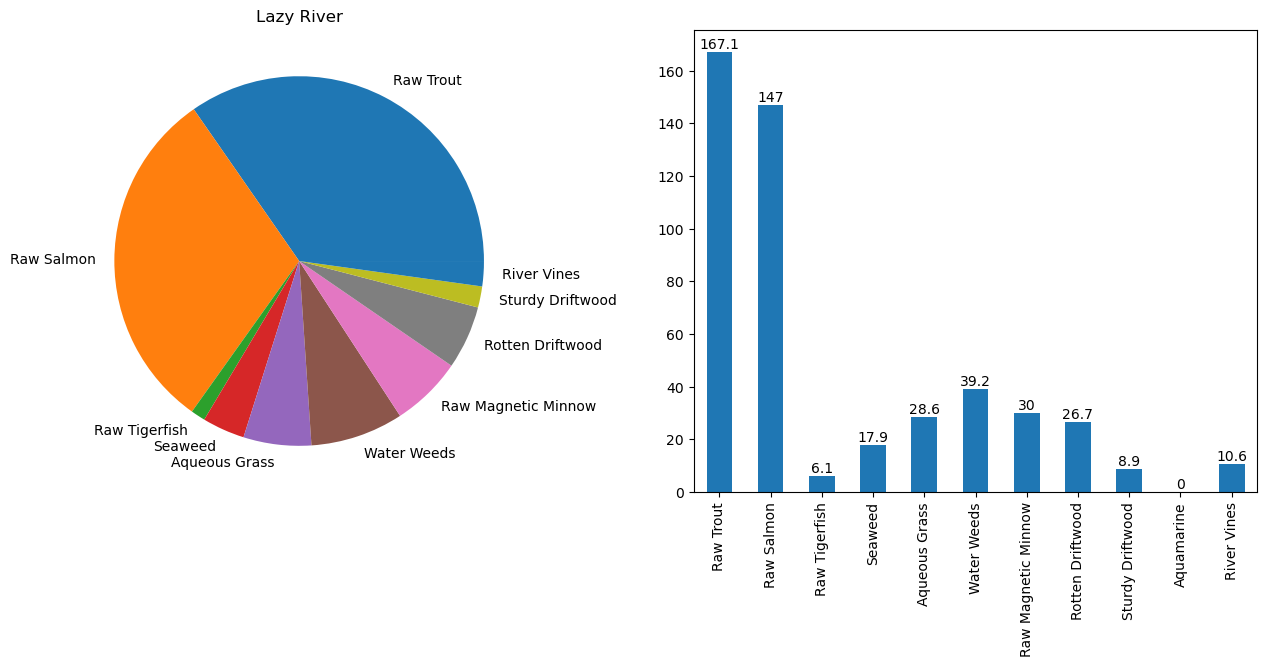

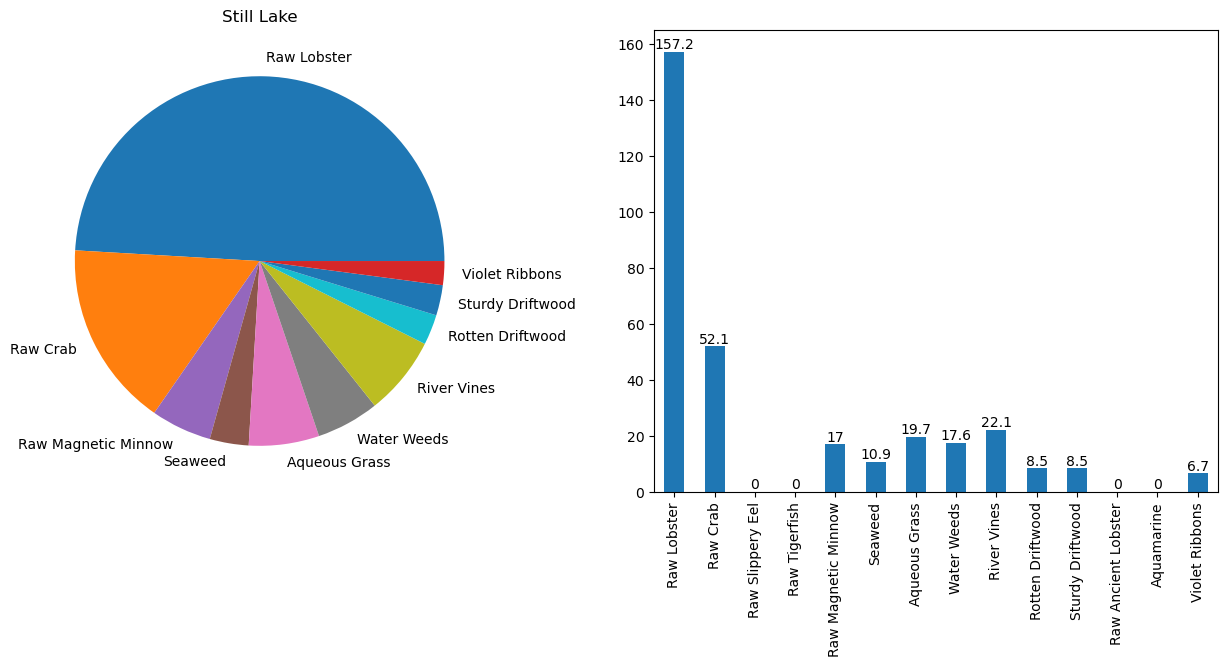

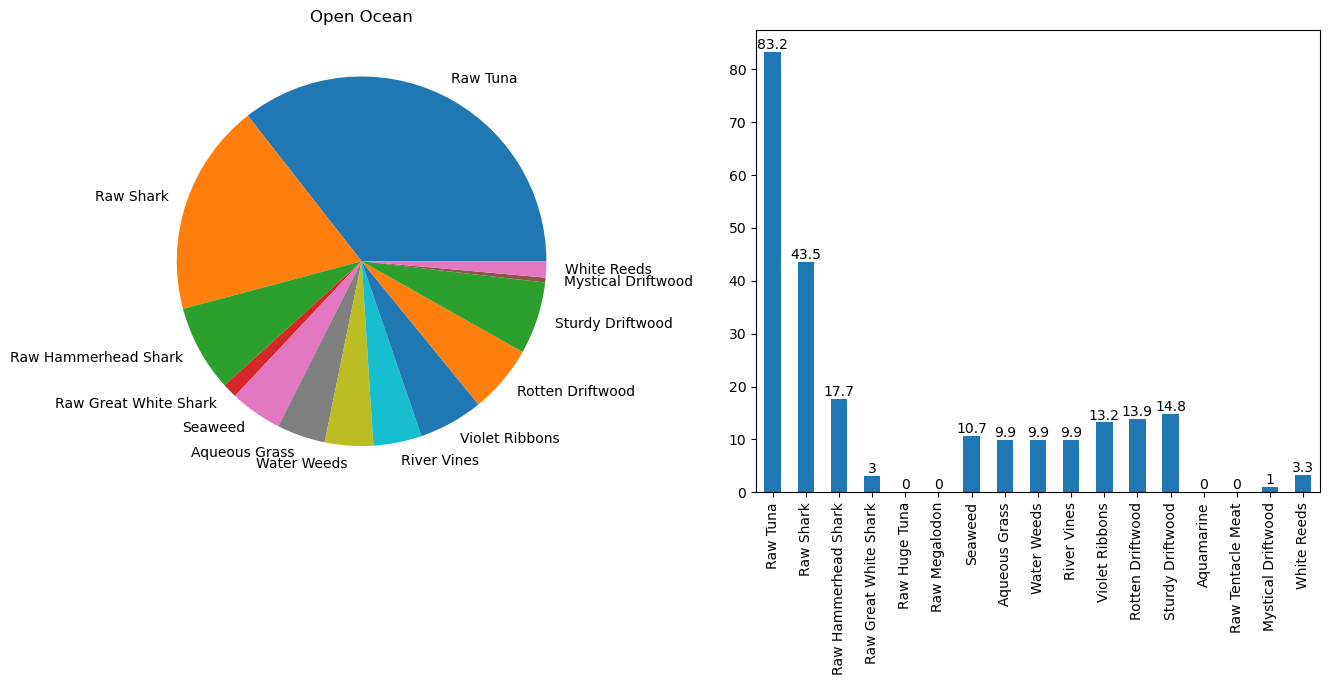

In [9]:
display(fishing.list_of_actions())
for action_name in fishing.list_of_actions():
    summary_plot(fishing, action_name)

In [10]:
# Things needed for MC generation
display(f'Zone levels: {[ loc.level for (k, loc) in fishing.locations.items() ]}')
# Min / Max bases
fishing.locations['Shallow Pond'].nodes['Shallow Flora'].minimum_base_amount
low = np.unique(np.concatenate([ [n.minimum_base_amount for (z, n) in v.nodes.items() ] for (k, v) in fishing.locations.items() ]))
high = np.unique(np.concatenate([ [n.maximum_base_amount for (z, n) in v.nodes.items() ] for (k, v) in fishing.locations.items() ]))
delta = np.max(high) - np.min(low)
display(f'Min: {low}, Max: {high} -> Delta: {delta}')

'Zone levels: [1, 20, 50, 65, 85]'

'Min: [1 2 3 4 5], Max: [ 1  2  3  4  6  7  8  9 12] -> Delta: 11'

In [11]:
with open('data/locations.json') as j:
    data = json.load(j)
    
#for (k, v) in data.items():
#    print(k, v['name'])
#display(data.keys())
display(data['154']['accessRequirements']['requiredSkills'])
display(data['56']['accessRequirements']['requiredSkills'])
#data['154']['accessRequirements']['requiredSkills']

[{'skill': 'fishing', 'level': 65}]

[{'skill': 'mining', 'level': 60}]

In [12]:
def pretty_print_loc(action, location_name):
    loc = action.locations[location_name]
    for (k, node) in loc.nodes.items():
        print(f'~~~ {k} ~~~' )
        print(f'{"":<4}{node.tags}: {node.frequency} -> {node.max_frequency} :: {node.minimum_base_amount} - {node.maximum_base_amount}')
        for (k, v) in node.loot.items():
            iname = action.player.item_data[str(k)]['name']
            iexp = action.player.item_data[str(k)].get('experience', 0)
            min_count = v.min_amount
            max_count = v.max_amount
            freq = v.frequency
            print(f'{"":<4}{iname:<25} {min_count:>10} -> {max_count} ({(max_count+min_count)/2:0.1f}) ... [{freq:>5}]')
            #if iname not in item_name:
            #    item_name.append(iname)
            #    item_xp.append(iexp)
            #    item_id.append(k)
            
def zone_summary_pretty(action):
    display(action.list_of_actions())
    for locname in action.list_of_actions():
        print(locname)
        pretty_print_loc(action, locname)
#zone_summary_pretty(fishing)
#pretty_print_loc(fishing, 'Open Ocean')
#pretty_print_loc(mining, 'Ocean')
zone_summary_pretty(mining)

dict_keys(['Clay Pit', 'City Outskirts Mine', 'Village Quarry', 'Desert Mine', 'Underground Mine', 'Hidden Mine', 'Volcano Mine', 'Slate Spires', 'Deep Pit'])

Clay Pit
~~~  ~~~
    []: 1 -> 1 :: 1 - 1
    Clay                               1 -> 1 (1.0) ... [   40]
    Copper Ore                         1 -> 1 (1.0) ... [   20]
    Tin Ore                            1 -> 1 (1.0) ... [   20]
    Stone                              1 -> 1 (1.0) ... [   10]
    Sand                               1 -> 2 (1.5) ... [   10]
    Fat Nightcrawler Bait              1 -> 1 (1.0) ... [    1]
City Outskirts Mine
~~~  ~~~
    []: 1 -> 1 :: 1 - 1
    Copper Ore                         1 -> 1 (1.0) ... [   30]
    Tin Ore                            1 -> 1 (1.0) ... [   30]
    Clay                               1 -> 3 (2.0) ... [   10]
    Stone                              1 -> 3 (2.0) ... [   10]
    Sand                               1 -> 3 (2.0) ... [   10]
    Iron Ore                           1 -> 1 (1.0) ... [    5]
    Coal                               1 -> 1 (1.0) ... [    5]
    Fat Nightcrawler Bait              1 -> 1 (1.0) ... [    1]
Village Q

In [13]:
player.item_data['4020']

fishing.locations['Open Ocean'].nodes['Ocean Flora'].loot[4020].item_class

'fiber'